# **Hasana Project**

**Project Summary:**

Our project focuses on developing an object detection system tailored specifically for recognizing various salat postures, including **Ruku** (bowing), **Raising**, **Takbeer** (standing), and **Sujud**. These postures are fundamental components of the Islamic prayer ritual, and accurately detecting them holds significance for aiding individuals in performing prayers correctly and effectively.

 - Leveraging deep learning algorithms and computer vision methodologies, we train our model on annotated datasets comprising images or videos capturing individuals performing the salat.

The system's architecture incorporates advanced neural network models YOLO (You Only Look Once) V8,


In [ ]:
# Importing the drive module from Google Colab to mount Google Drive (Authorization).
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

In [ ]:

import cv2 # OpenCV for image processing
from google.colab.patches import cv2_imshow # Patched version of cv2_imshow for displaying images in Google Colab
import matplotlib.pyplot as plt
import os
import random
from matplotlib.patches import Rectangle

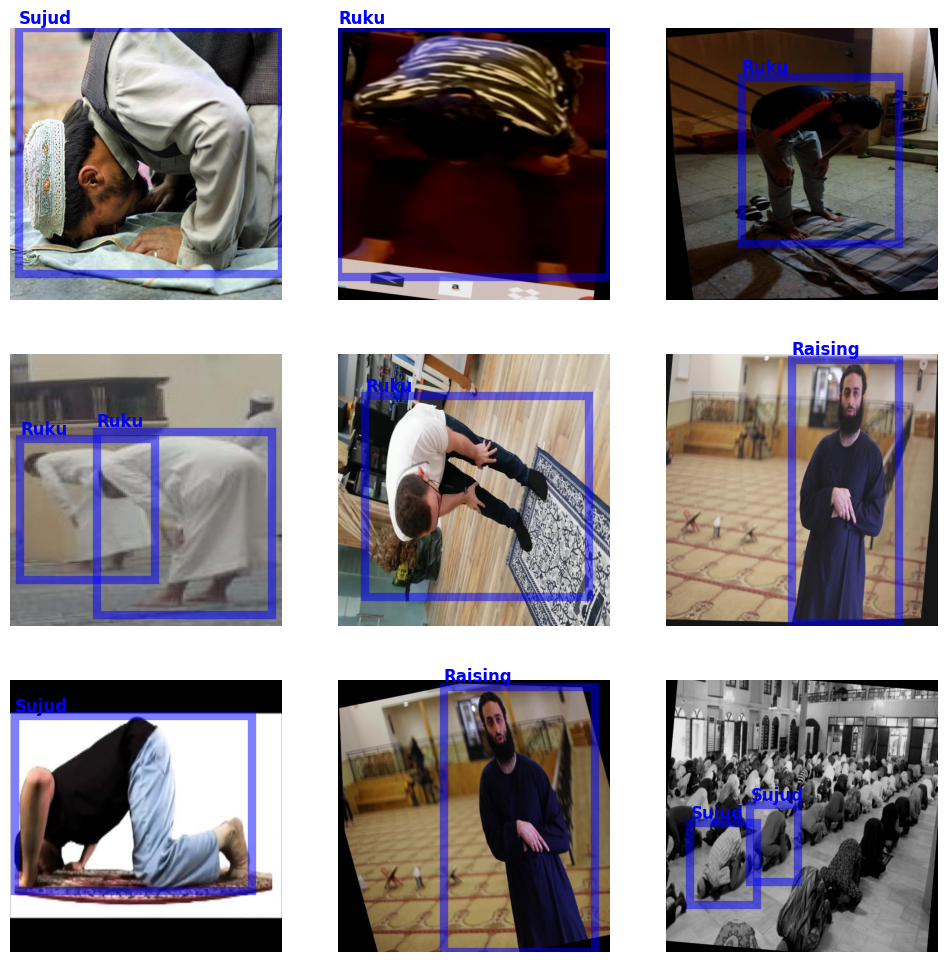

In [ ]:

# Define the class labels
class_labels = {
    0: "Raising",
    1: "Ruku",
    2: "Sujud",
    3: "Takbeer"
}

# Path to the directory containing training images and annotations
data_dir = "/content/drive/MyDrive/Hassana/Dataset/train"

# Get a list of image files in the directory
image_files = [f for f in os.listdir(os.path.join(data_dir, "images")) if f.endswith(".jpg")]

# Randomly select 9 images
sample_images = random.sample(image_files, 9)

# Plotting the sample images
plt.figure(figsize=(12, 12))
for i, image_file in enumerate(sample_images):
    # Load the image
    image_path = os.path.join(data_dir, "images", image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load corresponding annotation file
    annotation_file = os.path.splitext(image_file)[0] + ".txt"
    annotation_path = os.path.join(data_dir, "labels", annotation_file)
    with open(annotation_path, 'r') as f:
        lines = f.readlines()

    # Plot the image with bounding boxes
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        # Convert normalized coordinates to absolute coordinates
        width *= image.shape[1]
        height *= image.shape[0]
        x_center *= image.shape[1]
        y_center *= image.shape[0]
        # Calculate bounding box coordinates
        x1 = x_center - width/2
        y1 = y_center - height/2
        # Create a rectangle patch with adjusted transparency
        rect = Rectangle((x1, y1), width, height, linewidth=6, edgecolor='b', facecolor='none', alpha=0.5)
        # Add the patch to the current axis
        plt.gca().add_patch(rect)
        # Get the label corresponding to the class ID
        label = class_labels[int(class_id)]
        # Add label with increased font size
        plt.text(x1, y1 - 10, label, fontsize=12, color='b', weight='bold')
    plt.axis('off')

plt.show()
